# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [670]:
import numpy as np
import pandas as pd

In [671]:
stdnt = pd.read_csv("students-data.csv",delimiter=';') 

In [672]:
stdnt.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [673]:
stdnt.index.name = 'number'

if pd.isnull(stdnt) is True:
    print("There is/are null data in the dataframe")
elif pd.isna(stdnt) is True:
    print("There is/are NA present in the dataframe")

##### Inference:
From the above condition, we can conclude that there are no NAs present in the dataset. 

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [674]:
print(stdnt.select_dtypes(exclude = np.number).columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


Above are the attributes that are not numeric in nature

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [675]:
#print(stdnt.shape)
stdnt_num = stdnt.select_dtypes(include = np.number)
length = np.array(stdnt_num.columns).size
variance = stdnt_num.var()
#print(variance)
col = []
for i in range(length):
    if (stdnt_num.iloc[:,i].var() < 1):
        col.append(stdnt.columns[i])
print(col)
stdnt_var = stdnt.drop(col,axis=1)
stdnt_var.head()

['address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Fjob']


,school,sex,age,Mjob,reason,guardian,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,at_home,course,mother,2,2,0,yes,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,at_home,course,father,1,2,0,no,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,at_home,other,mother,1,2,3,yes,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,health,home,mother,1,3,0,no,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,other,home,father,1,2,0,no,...,4,3,2,1,2,5,4,6,10,10


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [676]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical = stdnt_var.select_dtypes(exclude = np.number).columns
#print(categorical)
#categorical[1]
for i in range(categorical.size):
    name = categorical[i]
    stdnt_var[name]= label_encoder.fit_transform(stdnt_var[name])

#for i in range
#df= label_encoder.fit(df['species'])
stdnt_var.head(10)

,school,sex,age,Mjob,reason,guardian,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,0,0,1,2,2,0,1,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,0,1,2,0,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,2,1,1,2,3,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,1,1,1,3,0,0,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,2,1,0,1,2,0,0,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,3,3,1,1,2,0,0,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,2,1,1,1,2,0,0,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,2,1,1,2,2,0,1,...,4,1,4,1,1,1,6,6,5,6
8,0,1,15,3,1,1,1,2,0,0,...,4,2,2,1,1,1,0,16,18,19


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [677]:
stdnt_var.columns.get_loc("G1")
#stdnt_new = stdnt_var
done = False


In [678]:
if done is False:
    #we know that G1,G2,G3 are 24th, 25th and 26th columns in the dataframe
    for j in range(24,27):    
        for i in range(stdnt_var.iloc[:,j].size):
            if (stdnt_var.iloc[i,j]>=10):
                #print(stdnt_var.iloc[i,24])
                stdnt_var.iloc[i,j] = 1
                done = True
            else:
                #print(stdnt_var.iloc[i,24])
                stdnt_var.iloc[i,j] = 0
                done = True

In [679]:

stdnt_var.head(30)

,school,sex,age,Mjob,reason,guardian,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,0,0,1,2,2,0,1,...,4,3,4,1,1,3,6,0,0,0
1,0,0,17,0,0,0,1,2,0,0,...,5,3,3,1,1,3,4,0,0,0
2,0,0,15,0,2,1,1,2,3,1,...,4,3,2,2,3,3,10,0,0,1
3,0,0,15,1,1,1,1,3,0,0,...,3,2,2,1,1,5,2,1,1,1
4,0,0,16,2,1,0,1,2,0,0,...,4,3,2,1,2,5,4,0,1,1
5,0,1,16,3,3,1,1,2,0,0,...,5,4,2,1,2,5,10,1,1,1
6,0,1,16,2,1,1,1,2,0,0,...,4,4,4,1,1,3,0,1,1,1
7,0,0,17,2,1,1,2,2,0,1,...,4,1,4,1,1,1,6,0,0,0
8,0,1,15,3,1,1,1,2,0,0,...,4,2,2,1,1,1,0,1,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [680]:
x = stdnt_var.drop(columns = "G3",axis=1)
y = stdnt_var.pop("G3")

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [681]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=300, random_state=5)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [682]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [683]:
clf.fit(X_train,y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [684]:
print(clf.intercept_)

[0.14108226]


# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [685]:
coef = clf.coef_
col_name = x.columns
print(col_name)
print(coef)

Index(['school', 'sex', 'age', 'Mjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
[[-0.25976036 -0.08840524 -0.13791769 -0.1078049   0.14666179  0.12456124
  -0.01752273 -0.31372388 -0.11523988 -0.08019807 -0.25583277  0.46626513
  -0.12654559 -0.5383957   0.17094338 -0.28960059 -0.33706722  0.56034399
   0.0685365  -0.28930556 -0.33198472  0.55976751 -0.17280057 -0.02868018
   1.59688575  3.81319926]]


In [686]:
coefficients = pd.DataFrame([coef[0]],columns = col_name)
coefficients = coefficients.T.head(40)
print(coefficients.max())


0    3.813199
dtype: float64


# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [687]:
y_pred = clf.predict(X_test)

In [688]:
y_pred_train = clf.predict(X_train)

In [689]:
from sklearn.metrics import accuracy_score

In [690]:
score = accuracy_score(y_test,y_pred)

In [691]:
clf.score(X_test,y_test)

0.8842105263157894

In [692]:
print(score)

0.8842105263157894


In [693]:
score_train = accuracy_score(y_train,y_pred_train)

In [694]:
print(score_train)

0.9266666666666666


# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [695]:
bcdata = pd.read_csv("bc2.csv", delimiter = ',')
bcdata.head(15)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [696]:
len(bcdata.index)

699

In [697]:
bcdata.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [698]:
bcdata.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [699]:
def outlierlims(dataframe):
    q1 = dataframe.quantile(0.25)
    q3 = dataframe.quantile(0.75)
    IQR = q3-q1
    mean = dataframe.mean()
    upperlimit = mean + 1.5*IQR
    lowerlimit = mean - 1.5*IQR
    return upperlimit,lowerlimit

ul,ll = outlierlims(bcdata)

In [700]:
bcdata["Class"]= label_encoder.fit_transform(bcdata["Class"])

In [701]:
bcdata.head(15)
print(len(bcdata[bcdata.loc[:,"Class"] == 1].index))
print(len(bcdata[bcdata.loc[:,"Class"] == 0].index))

241
458


### Check Missing Values

In [702]:
if pd.isnull(bcdata) is True:
    print("There is/are null data in the dataframe")
elif pd.isna(bcdata) is True:
    print("There is/are NA present in the dataframe")
else:
    print("There are no null or NAs in the data")

There are no null or NAs in the data


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [703]:
#bcdata[bcdata.loc[:,"Bare Nuclei"] == '?']

In [704]:
print(len(bcdata[bcdata.loc[:,"Bare Nuclei"] == '?'].index))

16


In [705]:
bcdata.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,1.000000


In [706]:
#top value in the Bare Nuclei is 1
bcdata.replace('?',1,inplace = True)

In [707]:
print(len(bcdata[bcdata.loc[:,"Bare Nuclei"] == '?'].index))

0


### Print and plot the distribution of target variable (Class - using Histogram) 

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

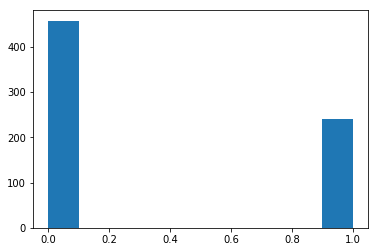

In [708]:
import matplotlib.pyplot as plt

plt.hist(bcdata.loc[:,"Class"])

### convert the datatype of Bare Nuclei to `int`

In [709]:
bcdata["Bare Nuclei"] = bcdata["Bare Nuclei"].astype('Int64')
bcdata.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

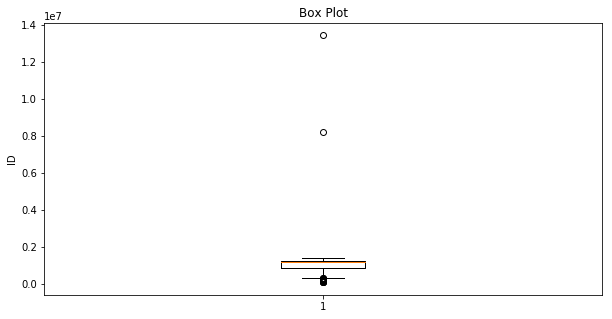

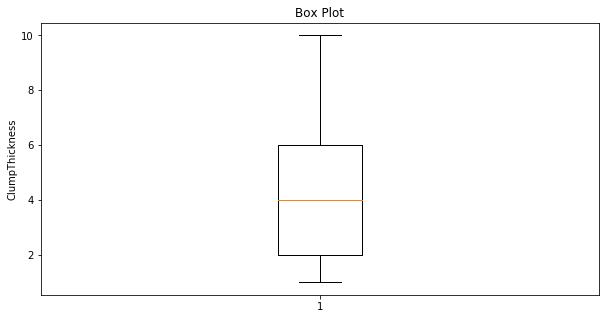

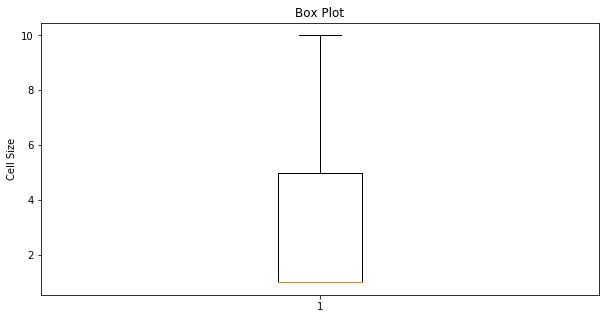

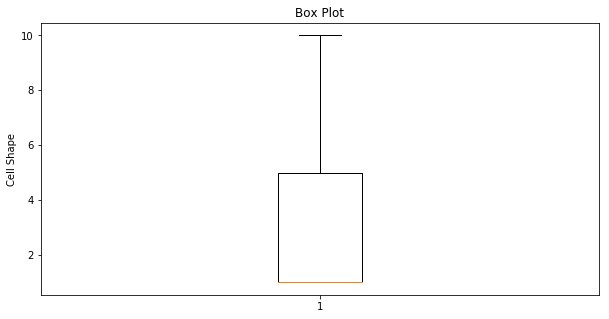

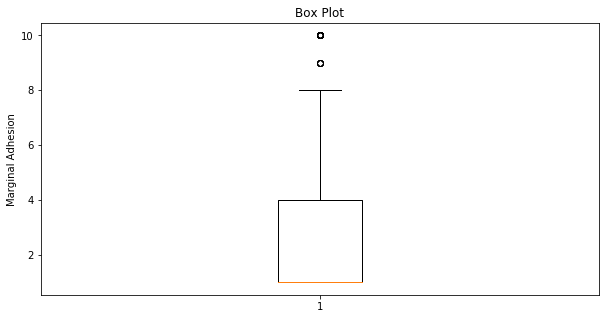

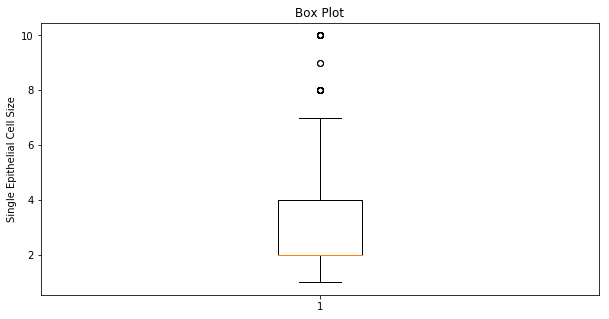

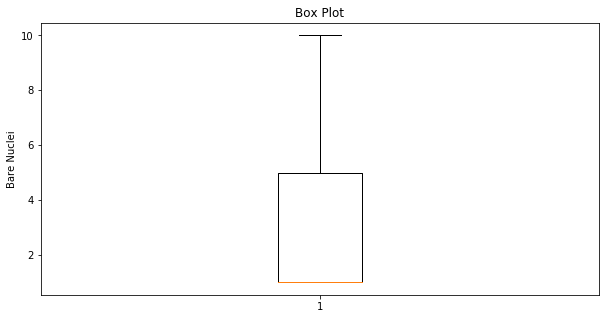

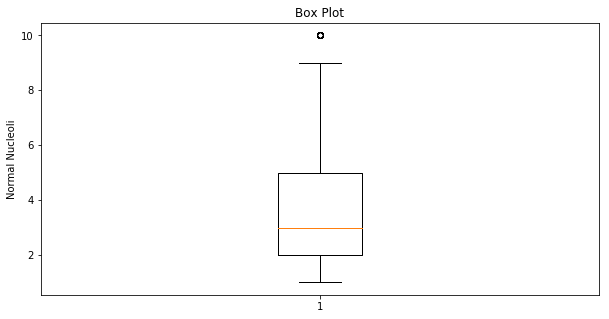

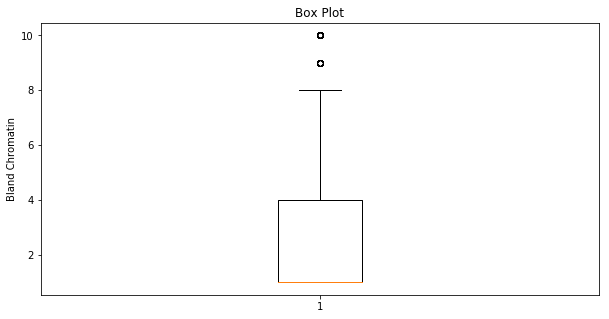

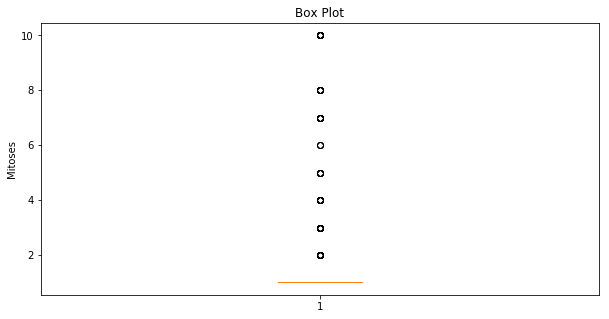

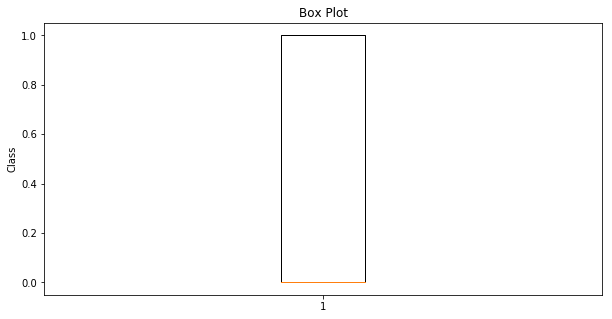

In [710]:
for i in range(len(bcdata.columns)):
    plt.figure(figsize=(10,5))
    plt.boxplot(bcdata.iloc[:,i])
    plt.title('Box Plot')
    plt.ylabel(bcdata.columns[i])
    plt.show()

### Standardization of Data (Use Standard Scaler)

In [711]:
## Since all the given values are already between the values 1-10, standardization of the variables is not required.



### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


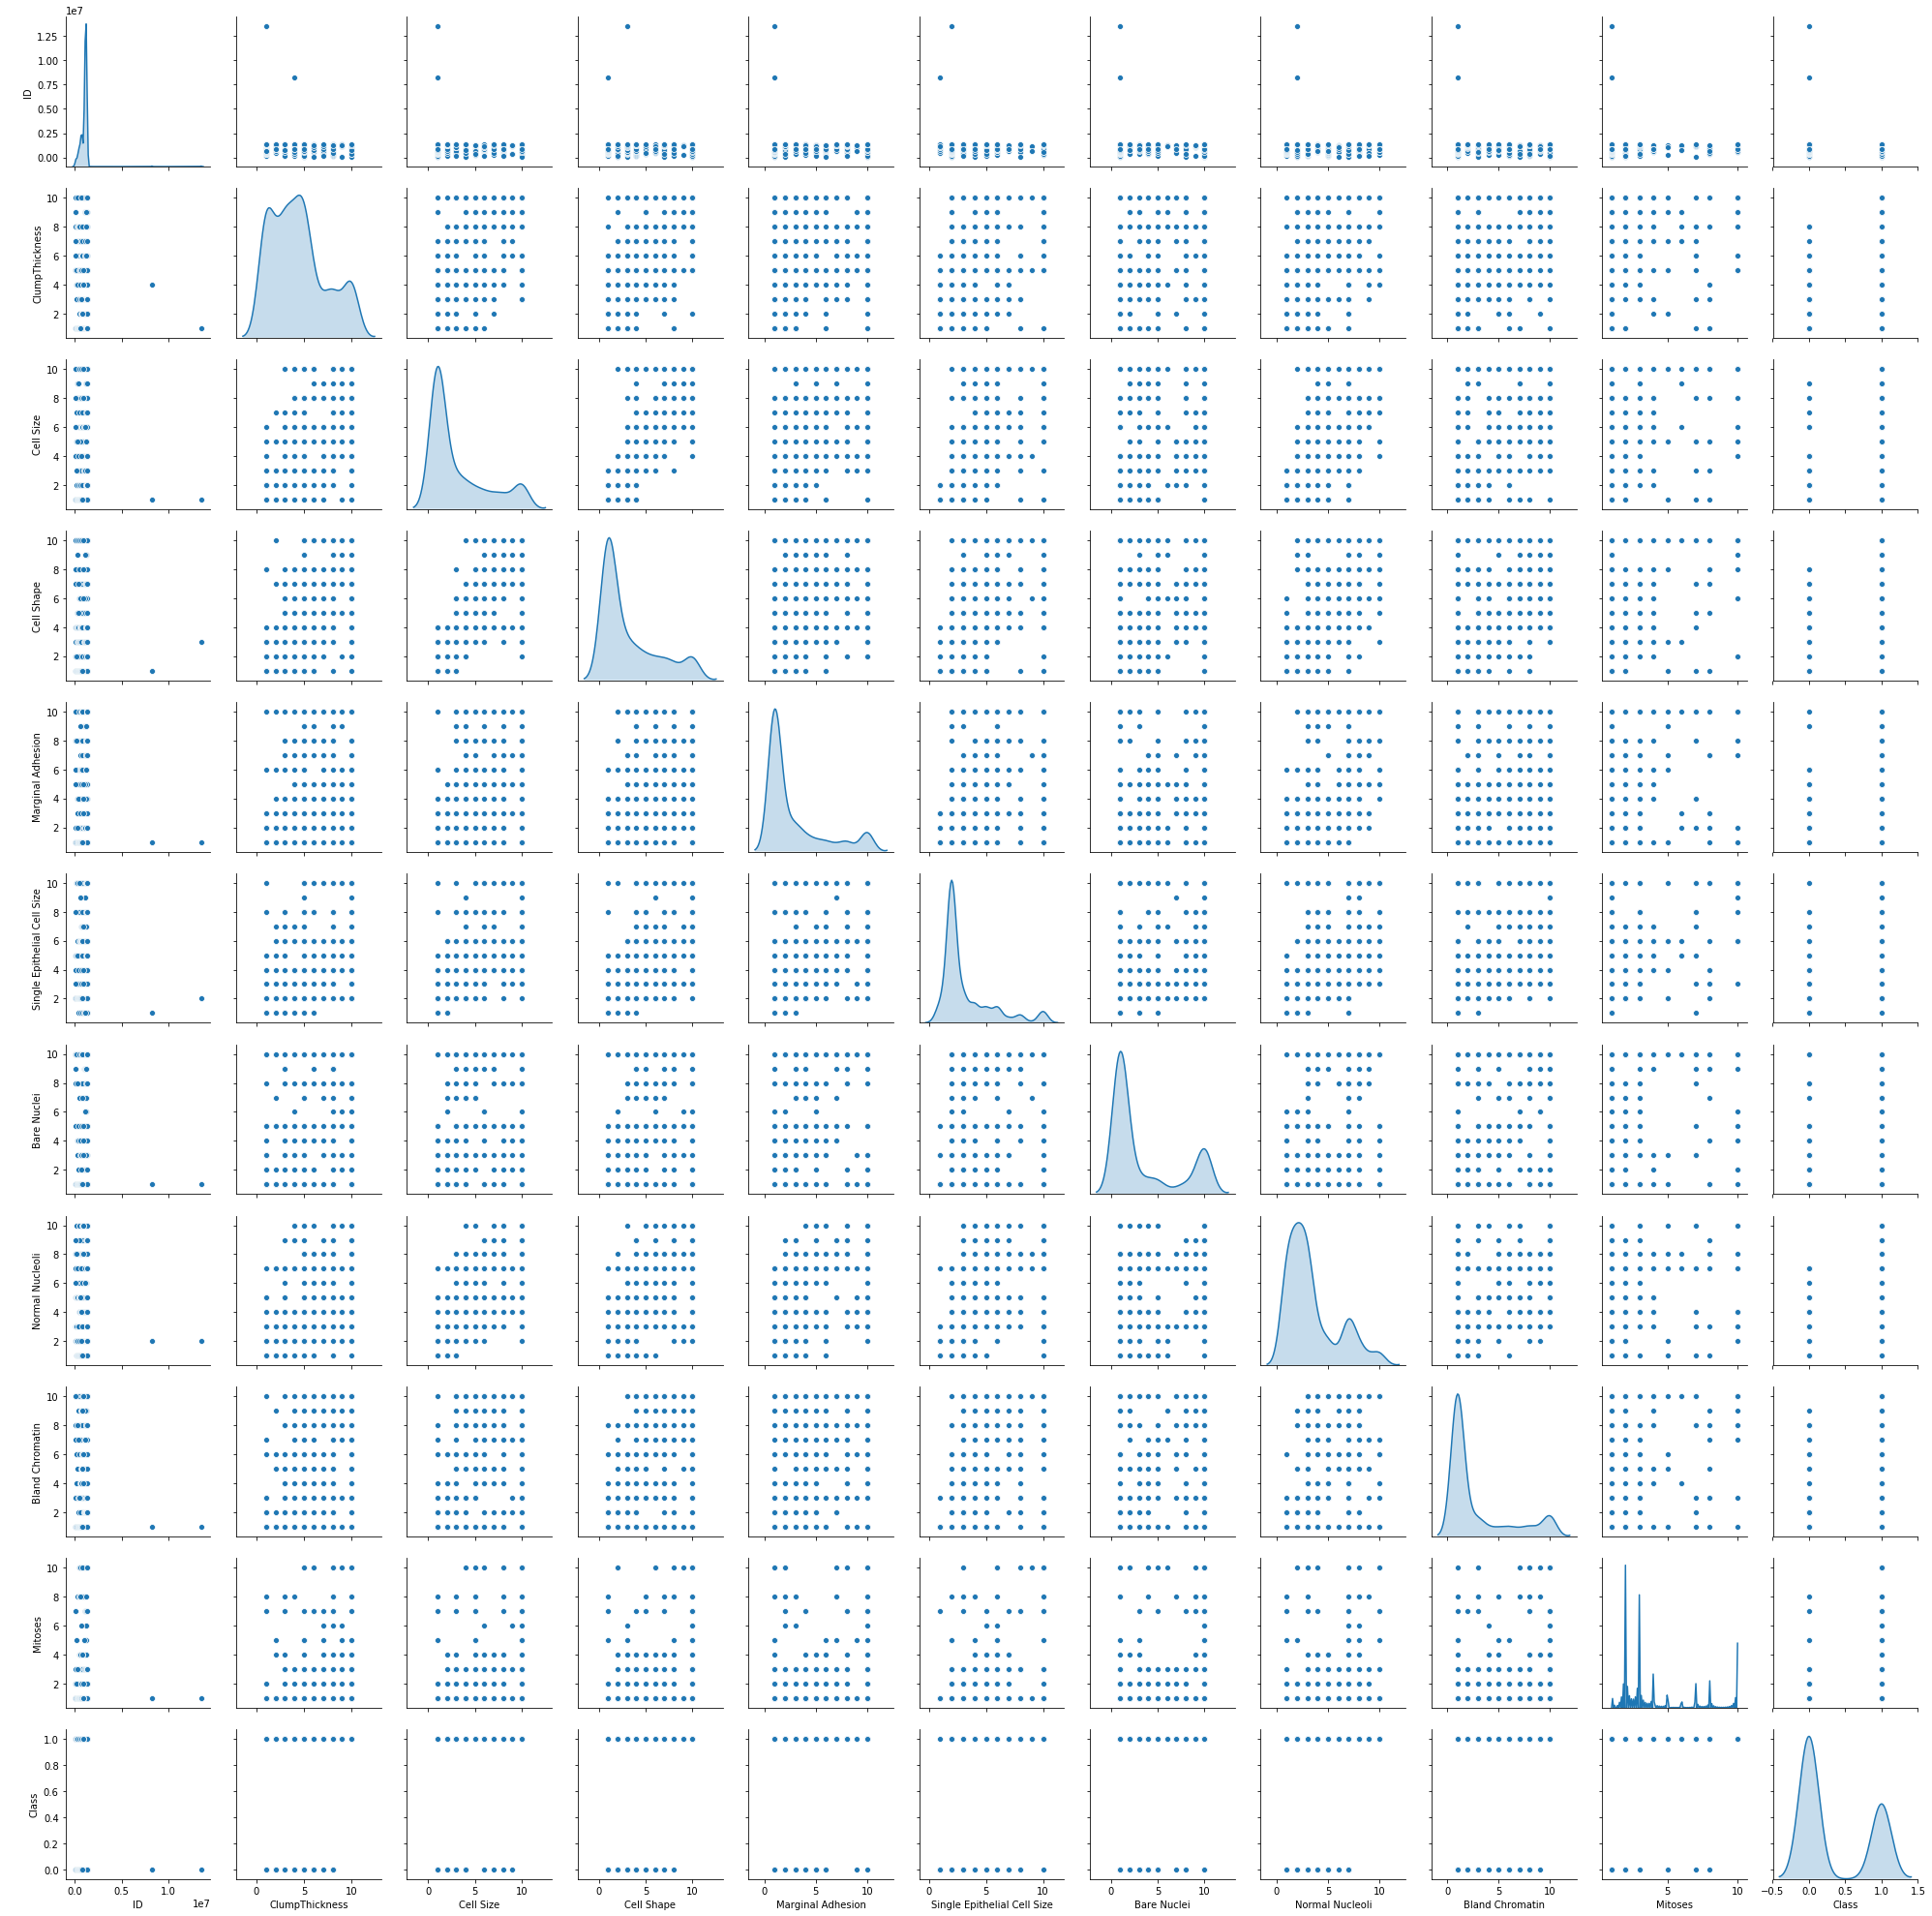

In [712]:
import seaborn as sns
sns.pairplot(bcdata, diag_kind='kde')

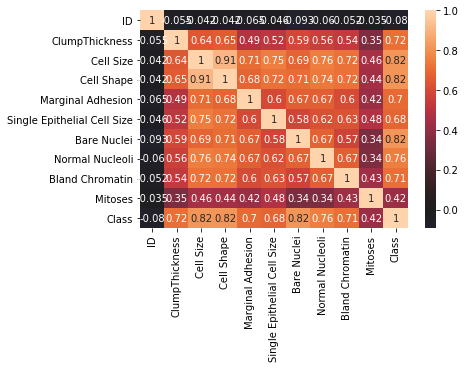

In [713]:
correlation = bcdata.corr()
sns.heatmap(correlation, annot = True, center=0)

### Divide the dataset into feature set and target set

In [714]:
x = bcdata.drop(columns="Class",axis = 1)
y = bcdata.pop("Class")

### Divide the Training and Test sets in 70:30 

In [715]:
X_train,X_test,y_train,y_test = train_test_split(x, y,train_size=0.7, random_state=5)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Model 1 : Implement a default Decision Tree model with no attributes

In [716]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [717]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                  Imp
ID                           0.025685
ClumpThickness               0.025097
Cell Size                    0.740494
Cell Shape                   0.066877
Marginal Adhesion            0.008695
Single Epithelial Cell Size  0.016030
Bare Nuclei                  0.054204
Normal Nucleoli              0.062918
Bland Chromatin              0.000000
Mitoses                      0.000000


### Check the training & test accuracy of model 1 

In [718]:
y_predict = dt_model.predict(X_test)
y_predict_train = dt_model.predict(X_train)

dt_model.score(X_train , y_predict_train)

print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

1.0
0.9333333333333333


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [719]:
dt_model2 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=5)
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [720]:
y_predict2 = dt_model2.predict(X_test)
y_predict2_train = dt_model2.predict(X_train)

print(dt_model2.score(X_train , y_train))
print(dt_model2.score(X_test , y_test))

0.9713701431492843
0.9285714285714286


### Print the confusion matrix of model 1 and model 2

In [721]:
from sklearn import metrics

print("Model 1")
print(metrics.confusion_matrix(y_test, y_predict))

print("Model 2")
print(metrics.confusion_matrix(y_test, y_predict2))

Model 1
[[132   7]
 [  7  64]]
Model 2
[[129  10]
 [  5  66]]
